In [1]:
"""
cross validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it.
"""

'\ncross validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it.\n'

In [2]:
import pandas as pd

df = pd.read_csv("data/winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# title of columns
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [8]:
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [11]:
df["quality"].value_counts()

quality
2    681
3    638
4    199
1     53
5     18
0     10
Name: count, dtype: int64

In [12]:
df.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [13]:
df = df.sample(frac=1).reset_index(drop=True)
# frac=1 means return all rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.0,0.705,0.05,1.90,0.074,8.0,19.0,0.99620,3.34,0.95,10.5,3
1,11.2,0.670,0.55,2.30,0.084,6.0,13.0,1.00000,3.17,0.71,9.5,3
2,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,4
3,7.9,0.300,0.68,8.30,0.050,37.5,278.0,0.99316,3.01,0.51,12.3,4
4,10.3,0.530,0.48,2.50,0.063,6.0,25.0,0.99980,3.12,0.59,9.3,3


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [15]:
df.index

RangeIndex(start=0, stop=1599, step=1)

In [16]:
df_train = df.head(1000)
df_test = df.tail(599)

In [17]:
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier(max_depth=3)

In [18]:
df.columns[:-1]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [20]:
cols = df.columns[:-1]
cols

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [21]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [22]:
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [23]:
train_predictions = clf.predict(df_train[cols])
test_predictions = clf.predict(df_test[cols])

train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

In [24]:
train_accuracy, test_accuracy

(0.593, 0.5242070116861436)

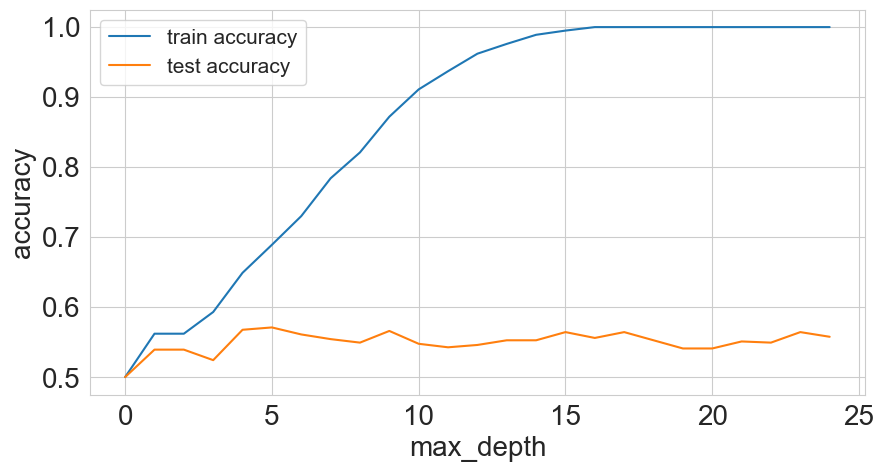

In [25]:
from sklearn import tree
from sklearn import metrics

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

train_accuracies = [0.5]
test_accuracies = [0.5]

for depth in range(1, 25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    cols = df.columns[:-1]
    clf.fit(df_train[cols], df_train.quality)
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

In [26]:
import numpy as np
import pandas as pd

from sklearn import model_selection
from sklearn import datasets

In [30]:
X, y = datasets.make_classification(
    n_samples=1000, n_features=20, n_classes=2, random_state=42
)
X

array([[-0.6693561 , -1.49577819, -0.87076638, ..., -1.26733697,
        -1.2763343 ,  1.01664321],
       [ 0.09337237,  0.78584826,  0.10575379, ..., -0.12270893,
         0.6934308 ,  0.91136272],
       [-0.90579721, -0.60834121,  0.29514098, ...,  0.83049813,
        -0.73733198, -0.5782121 ],
       ...,
       [-0.20013455, -1.46108168,  1.79701652, ..., -1.50280171,
        -1.27473745,  1.60111869],
       [ 0.03935575,  0.24868361, -0.47532342, ...,  0.09912579,
         0.54269228,  1.20827474],
       [ 0.76921528,  0.47076539,  0.16994471, ...,  0.6561162 ,
         0.64333186, -2.02100232]])

In [31]:
y

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,

In [32]:
X, y = datasets.make_regression(
    n_samples=1000, n_features=20, noise=0.1, random_state=42
)
X

array([[ 0.22584183,  1.55137772, -0.10734682, ..., -1.35154745,
         0.3646018 ,  0.13316649],
       [ 0.11083638, -1.45461475,  0.26388849, ..., -1.42646391,
        -0.60451386, -0.16624207],
       [ 0.45860045, -0.08127955, -0.69847376, ...,  0.90822252,
         0.51141526, -2.09317802],
       ...,
       [-0.5125888 ,  1.12477672,  0.89835957, ...,  0.6832124 ,
         1.09848488,  1.27442843],
       [-2.96836843, -0.92984795,  0.05520801, ...,  1.34954631,
        -0.489467  ,  1.23228383],
       [-0.48716718,  2.80137299, -1.08863484, ..., -2.21760908,
         0.50011283,  0.83533344]])

In [33]:
y

array([ 2.88732802e+00, -2.54379865e+02,  1.88854342e+02, -1.79585447e+02,
       -4.80788734e+01,  2.39149474e+02, -1.50848201e+02,  5.04209549e+01,
       -5.01494274e+00, -1.54877686e+02,  5.49256175e+00,  1.55739624e+01,
       -3.11666770e+02, -2.15504875e+02,  1.89932206e+02,  1.33656985e+02,
        6.35964986e+01,  9.71931458e+01,  3.67564459e+01, -1.14603500e+01,
        3.44074480e+01,  1.11323497e+00, -1.99644240e+02,  1.56371739e+02,
       -1.91471003e+02,  5.08273286e+01,  1.97183359e+02,  1.02658640e+02,
        3.48936318e+02, -1.87651315e+02,  3.46818786e+02, -1.75598881e+02,
        7.38150461e+01, -2.09811925e+02,  1.69119985e+02,  9.66667147e+01,
       -1.88238742e+02, -1.89756566e+02,  2.33684367e+02,  1.73623939e+02,
        3.14671349e+02, -4.86977718e+02,  6.27632764e+01, -2.55091051e+02,
        6.68354893e+01,  1.92047170e+02,  2.08143963e+02, -2.38385548e+02,
       -1.69401627e+02, -1.75668000e+02,  1.93024794e+02,  3.78338450e+02,
        1.25351049e+02,  

In [34]:
df = pd.DataFrame(
    X,
    columns=[f"f_{i}" for i in range(X.shape[1])]
)
df.loc[:, "target"] = y
df

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,target
0,0.225842,1.551378,-0.107347,0.859695,-0.942963,-1.096625,-1.197167,-1.733767,-0.950042,1.274060,...,1.477373,0.335126,-0.621135,-1.525106,1.011097,1.478184,-1.351547,0.364602,0.133166,2.887328
1,0.110836,-1.454615,0.263888,-1.654510,0.818549,0.482849,0.358334,-0.061366,0.327626,1.270846,...,-0.546838,2.679629,-1.851587,0.872090,-0.987858,1.744496,-1.426464,-0.604514,-0.166242,-254.379865
2,0.458600,-0.081280,-0.698474,0.737528,0.860085,0.275249,0.333945,-1.076817,0.947821,-0.181406,...,0.379610,1.508083,0.555380,-1.383018,-0.836187,0.606730,0.908223,0.511415,-2.093178,188.854342
3,-1.795643,-0.453414,-0.423760,0.155325,0.487775,0.398147,0.732829,2.042178,0.733548,1.598322,...,-0.734233,0.076609,1.048483,0.008784,-0.141530,-2.104750,-0.330090,-0.511764,-0.237683,-179.585447
4,-1.180626,0.339530,0.328010,-0.224555,0.963951,-1.058450,0.941256,0.968745,-0.002686,0.042907,...,-1.049914,-1.078364,-0.494912,-0.518436,0.269235,-0.668149,-1.044086,0.482665,-0.579855,-48.078873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.726964,-0.372833,0.722381,1.024063,-1.760809,0.592527,0.224685,1.208366,2.558199,-0.551858,...,-1.525656,1.542110,-1.418366,-0.564248,1.262584,2.061504,-0.399636,2.006093,0.184551,-80.115568
996,0.919229,-1.438278,0.113270,2.062525,1.281016,-1.067533,1.873298,0.423599,-0.846357,0.484733,...,0.067856,-0.334775,-0.447322,-0.643550,0.852774,-0.955123,-0.668144,-0.403648,1.029961,159.050361
997,-0.512589,1.124777,0.898360,0.906544,-2.301472,0.072252,1.390255,0.064506,-0.187859,-0.258939,...,-0.820879,-0.171674,-0.246335,1.118895,-0.426804,0.357661,0.683212,1.098485,1.274428,20.397855
998,-2.968368,-0.929848,0.055208,1.366747,0.427677,0.313143,0.720224,0.733348,1.516288,-0.920583,...,-0.704360,0.038916,-0.607323,-1.570237,0.204857,0.167003,1.349546,-0.489467,1.232284,-139.447959


In [ ]:
def create_folds(data):
    data["kfold"] = -1
    data = data.sample(frac=1).reset_index(drop=True)
    num_bins = int(np.floor(1 + np.log2(len(data))))
    data.loc[:, "bins"] = pd.cut(data["target"], bins=num_bins, labels=False)
    kf = model_selection.StratifiedKFold(n_splits=5)
    for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[v_, 'kfold'] = f
    data = data.drop("bins", axis=1)
    return data

In [36]:
pd.cut(df["target"], bins=2, labels=False)

0      1
1      0
2      1
3      0
4      0
      ..
995    0
996    1
997    1
998    0
999    1
Name: target, Length: 1000, dtype: int64